# Python - Numpy ile Yapay Zeka için Temel Matematik Fonksiyonlar ve Veri Yapıları

## Içindekiler

1. [Turev, Kismi Turev, Vektor Turevi, Jakobi Matrisi, Zincir Kuralı, Eğim (Gradient) Hesaplamaları](#grad)
2. [Operasyon, Hesap Grafigi](#comp-graph)
5. [Turev Farki Alimi](#turev-farki)



## Turev, Zincir Kuralı, Eğim (Gradient) Hesaplamaları <a name="grad"></a>

In [1]:
import numpy as np
from typing import List, Tuple, Callable
from uuid import uuid4
import matplotlib.pyplot as plt
import pdb


def boyut_kontrol(x: np.ndarray, boyut=1):
    if x.ndim > boyut:
        raise ValueError("Arguman: " + str(boyut) + 
                         " boyutuna esit veya az olmali, oysa ki; " 
                         + str(x.ndim))

In [2]:
mnist_egit = np.genfromtxt("../data/mnist_train.csv",
                            delimiter=",", 
                            skip_header=1,
                            dtype=np.float,
                           max_rows=1000
                           )
mnist_test = np.genfromtxt("../data/mnist_test.csv", 
                           delimiter=",", 
                           skip_header=1, 
                           dtype=np.float, 
                           max_rows=1000)

In [3]:
orneklem_dizini = np.array(list(range(mnist_egit.shape[0])))
np.random.shuffle(orneklem_dizini)
orneklem_dizini = orneklem_dizini[:2000]
orneklem_dizini

array([981, 221, 725, 866, 234, 681,  50, 606, 254, 433, 581, 691, 731,
       298,  40, 700, 844,   1, 292, 976, 856, 677, 674, 568, 357, 194,
       776, 140, 721, 775, 648, 655, 767, 366, 609,   7, 801, 278, 701,
       685, 549, 919, 248, 245, 518, 203, 868, 332, 473, 797, 664, 260,
       342, 108, 562, 930, 824, 429, 350, 859, 434,  56, 150, 306, 894,
       164, 666, 943, 230, 310, 116, 488, 799, 250,   9, 275, 451, 764,
       837, 290, 965, 969, 870, 328, 470, 137, 404, 877, 197,  64, 173,
       740, 408, 343, 789, 708, 412, 249, 755, 214,  42, 141, 131, 567,
       536,  36, 240, 452, 174, 765,  57, 162, 415, 937, 407, 854, 191,
       256, 852, 354, 413, 398, 474, 668, 886, 370, 296, 266, 148, 268,
       511, 257, 445, 978, 779,  33, 699, 860,  48, 817, 418, 715, 959,
       485, 176, 353, 649, 293, 223, 385, 960, 980, 512, 653, 993, 510,
       968, 291, 188, 914,  47, 436, 129,  84, 215, 127, 958, 475, 517,
       643, 848, 639, 597, 584, 400, 553, 384, 233, 615,  86, 72

- Turev : Eger $f: \mathbb{R} \to \mathbb{R}$ ise f'in turevi:
$$f'(x) = \lim_{h\to 0} \frac{f(x+h) - f(x)}{h}$$

Kismi Turev: Eger $f: \mathbb{R}^n \to \mathbb{R}$ ise f'in turevi:
$$f'(x_1, ..., x_n) = \lim_{h\to0} \frac{f(x_1, ..., x_i+h, ..., x_n) - f(x_1, ..., x_n)}{h}$$

Kismi turevde şu notasyon da kullanılabiliyor: $\frac{df}{dx}$ f fonksiyonunun x'e gore turevi manasinda



In [4]:
def turev(f: Callable[[float], float], x: float, h=1e-8) -> float:
    "f fonksiyonunun turevini alir"
    f_t = (f(x + h) - f(x)) / h
    return f_t

def kismi_turev(f: Callable[[List[float]], float], 
                argumanlar: list, 
                arguman_sirasi: int, 
                h=1e-8) -> np.ndarray:
    """
    kismi turev alimi:
    Iki deger alan bir fonksiyon dusunelim:
    f(x, y) = x^2 + xy + y^2
    f: R x R -> R.
    Dikkat Fonksiyon skaler bir çikti veriyor, vektor degil
    x,y fonksiyonun argumanlari.
    f_x', yani f'in x'e gore turevi => (f(x+h, y) - f(x,y)) / h
    f_y', yani f'in y'ye gore turev => (f(x, y+h) - f(x,y)) / h
    
    Bunu n degerli halde de yazabiliriz:
    f(x_1, ..., x_n) = (f(x_1, ..., x_j, ..., x_n) - f(x_1, ..., x_n)) / h
    """
    kopya = argumanlar.copy()
    kopya[arguman_sirasi] = kopya[arguman_sirasi] + h
    return (f(kopya) - f(argumanlar)) / h

def meyil_hesabi(f: Callable[[List[float]], float], 
                argumanlar: list, 
                h=1e-8) -> List[float]:
    """
    f'in toplam turevi [f_x'(), f_y'()] ki buna gradyan/meyil (gradient) deniyor
    DIKKAT! Arguman sayisi kadar kismi turevi alinmasi gereken deger var.
    """
    meyil: List[float] = []
    for sira, arguman in enumerate(argumanlar):
        kturev = kismi_turev(f=f, argumanlar=argumanlar, arguman_sirasi=sira)
        meyil.append(kturev)
    return meyil

In [5]:
# test edelim
def testfn(x): return x * x
turev_degeri = turev(testfn, x=5)
print("x^2 turevi = 2x => 5^2 turevi 2 * 5", 
      10 == round(turev_degeri, 3))

x^2 turevi = 2x => 5^2 turevi 2 * 5 True


In [6]:
def test_kismi_fn(xs: list): return (xs[0] ** 2) + (xs[0] * xs[1]) + (xs[1] ** 2)
# x^2 + xy + y^2
# f_x' = 2x + y , f_y' = 2y + x
xturev = kismi_turev(f=test_kismi_fn, argumanlar=[2, 6], arguman_sirasi=0)
yturev = kismi_turev(f=test_kismi_fn, argumanlar=[2, 6], arguman_sirasi=1)
print("f(x,y) = x^2 + xy + y^2, x=2, y=6")
print("f_x'(x,y) = 2x + y => 4 + 6 = 10")
print("f_y'(x,y) = 2y + x => 2 + 12 = 14")
print("f_x'(x,y) = 10", round(xturev, 3) == 10)
print("f_y'(x,y) = 14", round(yturev, 3) == 14)

f(x,y) = x^2 + xy + y^2, x=2, y=6
f_x'(x,y) = 2x + y => 4 + 6 = 10
f_y'(x,y) = 2y + x => 2 + 12 = 14
f_x'(x,y) = 10 True
f_y'(x,y) = 14 True


In [7]:
meyil = meyil_hesabi(f=test_kismi_fn, argumanlar=[2, 6])
print("∇f(x,y), f'in meyili, yani [f_x', f_y'] => [10, 14]")
print("∇f(x,y)= [10, 14], ", [round(m, 3) for m in meyil] == [10, 14])

∇f(x,y), f'in meyili, yani [f_x', f_y'] => [10, 14]
∇f(x,y)= [10, 14],  True


Vektor degerli fonksiyon turevi: Eger $f: \mathbb{R} \to \mathbb{R}^n$ ise $f(x) = [f_1(x), ..., f_n(x)]$ demektir, yani $f_i: \mathbb{R} \to \mathbb{R}$

Turevi:
$$f'(x) = [f_1'(x), f_2'(x), ..., f_n'(x)]$$

Daha somut bir ornek: $$f(t) = [t^2, 1/t, t * 2]$$ diyelim, bunu söyle de yazabiliriz:
$$f(t) = [g(t), k(t), p(t)]$$.

Peki f'in turevi o halde nedir ? Basitçe f'in turevi $f'(t)=[g'(t), k'(t), p'(t)]$

Soru su g(t), k(t), nereden geliyor yani bunlari bilmiyorsak ne yapacagiz ?

$$f'(t) = \lim_{h \to 0} \frac{f(t+h) - f(t)}{h}$$

In [8]:
def vektor_turevi_bilinen(fs: List[Callable[[float], float]], 
                  x: float,
                  h=1e-8)-> List[float]:
    eleman_turevleri = []
    for f in fs:
        eleman_turevi = turev(f, x)
        eleman_turevleri.append(eleman_turevi)
    return eleman_turevleri

def vektor_turevi(f: Callable[[float], List[float]], 
                 x: float, 
                 h=1e-8) -> List[float]:
    "vektor turevi alimi"
    return list((np.array(f(x + h)) - np.array(f(x))) / h)

In [9]:
# testler
def testfn(x): return [x*x, 2 * x, x - 1]
# turevi bunun 2x, 2, 1
vbilinen = vektor_turevi_bilinen(fs=[lambda x: x*x, 
                                     lambda x: 2 * x, 
                                     lambda x: x -1],
                                 x=3)
print("unsurlar bilindiginde olusan turev", 
      [round(v, 3) for v in vbilinen] == [6, 2, 1])
vbilinmeyen = vektor_turevi(f=testfn, x=3)
print("unsurlar bilinmediginde olusan turev", 
      [round(v, 3) for v in vbilinmeyen] == [6, 2, 1])

unsurlar bilindiginde olusan turev True
unsurlar bilinmediginde olusan turev True


$x \in \mathbb{R}^n$ ve $f(x) \in \mathbb{R}^m$. 

Dolayisiyla: $f: \mathbb{R}^n \to \mathbb{R}^m$

Soru basit: $f'(x)$ nedir ?

mxn boyutlu jakobi matrisi: $$f'(x)= J(f) = \pmatrix{
f'_1(x_1, ..., x_n)  \\
f'_2(x_1, ..., x_n) \\
... \\
f'_m(x_1, ..., x_n)
}$$
Daha açik ifadesiyle: 
$ \vec{x} = \{x_1, x_2, ..., x_n\}$ ve $\vec{y} = \{y_1, y_2, ..., y_m\}$ olsun.
$f: x \to y$ ise f'in turevi onun jakobi matrisidir yani.
$$J(f) = \pmatrix{
f_{x_1, y_1}'(x) = \frac{f(x_1+h, ..., x_n) - f(x)}{h} & ... & f_{x_n, y_1}'(x) = \frac{f(x_1, ..., x_n+h) - f(x)}{h} \\
f_{x_1, y_2}'(x) = \frac{f(x_1+h, ..., x_n) - f(x)}{h} & ... & f_{x_n, y_2}'(x) = \frac{f(x_1, ..., x_n+h) - f(x)}{h} \\
\vdots & ... & \vdots \\
f_{x_1, y_m}'(x) = \frac{f(x_1+h, ..., x_n) - f(x)}{h} & ... & f_{x_n, y_m}'(x) = \frac{f(x_1, ..., x_n+h) - f(x)}{h}
}$$

Somutlastiralim:
$f(x,y,z) = [(2x + y), 3z/2, y^2+z, 6x]$. 

$$J(f) = \pmatrix{
2 & 1 & 0 \\
0 & 0 & \frac{3}{2} \\
0 & 2y & 1 \\
6 & 0 & 0
}$$

Yine her zamanki soru su olusturan fonksiyonlari bilmiyorsak ne yapacagiz?
Turevini aradigimiz fonksiyonunun argumanlarina gore kismi turevini alacagiz. 
`numpy`'da nasil yapildigini gosteren fonksiyon `jakobi_np_n`.

In [10]:
def jakobi_bilinen(fs: List[Callable[[List[float]], float]], 
           argumanlar: List[float], h=1e-8) -> List[List[float]]:
    j_mat = []
    for f in fs:
        f_turev = meyil_hesabi(f=f, argumanlar=argumanlar, h=h)
        j_mat.append(f_turev)
    return j_mat

def jakobi(f: Callable[[List[float]], List[float]], 
           argumanlar: List[float], 
           h=1e-8) -> List[List[float]]:
    ""
    yeni_argumanlar = [a for a in argumanlar] 
    j_mat = []
    for i, a in enumerate(argumanlar):
        yeni_arg = a + h
        yeni_argumanlar[i] = yeni_arg
        arg_turevi = list((np.array(f(yeni_argumanlar)) - np.array(f(argumanlar))) / h)
        j_mat.append(arg_turevi)
        yeni_argumanlar[i] = a
    return j_mat

def jakobi_np_1d(f: Callable[[np.ndarray], np.ndarray], argumanlar: np.ndarray, h=1e-8):
    "numpy jakobi"
    boyut_kontrol(argumanlar)
    sonuc = f(argumanlar)
    j_mat = np.zeros((sonuc.size, argumanlar.size), dtype=np.float)
    for i, a in enumerate(argumanlar):
        yeni_arg = argumanlar.copy()
        yeni_arg[i] = a + h
        j_mat[:, i] = (f(yeni_arg) - f(argumanlar)) / h 
    return j_mat

def jakobi_np_n(f: Callable[[np.ndarray], np.ndarray], argumanlar: np.ndarray, h=1e-8):
    """
    n boyutlu jakobi tensoru en geneli ve matematiksel olarak en dogru olani
    """
    sonuc = f(argumanlar)
    j_mat = np.zeros((*argumanlar.shape, *sonuc.shape), dtype=np.float)
    for index in np.ndindex(argumanlar.shape):
        yeni_arg = argumanlar.copy()
        yeni_arg[index] += h
        j_mat[index] = (f(yeni_arg) - f(argumanlar)) / h
    return j_mat.reshape((sonuc.size, argumanlar.size))

# f: R -> R = f(x) = x ** 2 + 2 / x + 2 = f(3) = 9 + 2/3 + 2
# f: R^n -> R f(x, y, z) = x**2 + 2 * y + z = f(3, 4, 5) = 9 + 8 + 5 = 22
# f_x(x, y, z), f_y, f_z = 2 * x, 2, 1
# [f'_x, f_y, f_z] = [2x, 2, 1]
# f(x,y,z) = [x, y, z, 13, 92 * x, 2000 / y]


In [11]:
def f1(arg: List[float]): return 2*arg[0] + arg[1]
def f2(arg: List[float]): return (3 * arg[2]) / 2
def f3(arg: List[float]): return arg[1]*arg[1] + arg[2]
def f4(arg: List[float]): return 6*arg[0]
        
def testfn(arg: List[float]): 
    return [
    f1(arg), 
    f2(arg),
    f3(arg),
    f4(arg)
]
j_bilinen = jakobi_bilinen(
    fs=[f1,f2,f3,f4], argumanlar=[2,1, 3])
print("bilinen jakobi fonksiyon: ",
      np.around(np.array(j_bilinen), 3))
j_bilinmeyen = jakobi(f=testfn, argumanlar=[2,1,3])
print("bilinmeyen jakobi fonksiyon: ", np.around(np.array(j_bilinmeyen), 3))

def testfn_np(arg): 
    return np.array([
    2*arg[0] + arg[1], 
    (3 * arg[2]) / 2,
    arg[1]*arg[1] + arg[2],
    6*arg[0]])

print(testfn_np([2,1,3]))
j_np = jakobi_np_1d(f=testfn_np, argumanlar=np.array([2,1,3], dtype=np.float))
print("bilinmeyen jakobi np fonksiyon: ",np.around(np.array(j_np), 3))

bilinen jakobi fonksiyon:  [[2.  1.  0. ]
 [0.  0.  1.5]
 [0.  2.  1. ]
 [6.  0.  0. ]]
bilinmeyen jakobi fonksiyon:  [[2.  0.  0.  6. ]
 [1.  0.  2.  0. ]
 [0.  1.5 1.  0. ]]
[ 5.   4.5  4.  12. ]
bilinmeyen jakobi np fonksiyon:  [[2.  1.  0. ]
 [0.  0.  1.5]
 [0.  2.  1. ]
 [6.  0.  0. ]]


In [12]:
def testfn1(arg):
    return np.array([arg[0].sum() * 2, 
                     arg[1].sum() * 3, 
                     arg[2].sum() * 4], 
                    dtype=np.float)

def testfn2(arg):
    return np.array([arg[0] * 2, 
                     arg[1] * 3, 
                     arg[2] * 4], 
                    dtype=np.float)


j_np_n1 = jakobi_np_n(f=testfn1, 
                      argumanlar=np.array([[1, 2, 3, 4], 
                                           [5, 6, 7, 8],
                                           [9, 10, 11, 12]
                                          ], 
                                          dtype=np.float)
                     )

j_np_n2 = jakobi_np_n(f=testfn2, 
                     argumanlar=np.array(
                         [[1, 2, 3, 4],
                          [5, 6, 7, 8],
                          [9, 10, 11, 12]
                         ], 
                         dtype=np.float)
                    )


print("bilinmeyen jakobi np n boyutlu fonksiyon: ",
      np.around(j_np_n1, 3)
     )

print("bilinmeyen jakobi np n boyutlu fonksiyon: ",
      np.around(j_np_n2, 3)
     )

bilinmeyen jakobi np n boyutlu fonksiyon:  [[2. 0. 0. 2. 0. 0. 2. 0. 0. 2. 0. 0.]
 [0. 3. 0. 0. 3. 0. 0. 3. 0. 0. 3. 0.]
 [0. 0. 4. 0. 0. 4. 0. 0. 4. 0. 0. 4.]]
bilinmeyen jakobi np n boyutlu fonksiyon:  [[2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]


$ k(x) = f( g(x) ) $ veya $z = f(y)$ ve $y = g(x)$ 


$f: \mathbb{R} \to \mathbb{R}$, 

$g:\mathbb{R} \to \mathbb{R}$ 

$k:\mathbb{R} \to \mathbb{R}$ 


Zincir kuralı : 
$$k'(x) = f'( g(x) ) * g'(x)$$ 
veya 
$$\frac{dz}{dx} = \frac{dz}{dy} * \frac{dy}{dx}$$



In [13]:
def zincirle(f: Callable[[float], float], g: Callable[[float], float], x: float):
    "Zincir kuralini uygular f ve g için"
    g_turev = turev(g, x)
    g_deger = g(x)
    f_turev = turev(f, g_deger)
    return f_turev * g_turev

In [14]:
# test zincir
def f(x): return 2 * x
def g(x): return x * x
# turevi 2 * 2x = 4x =1
def testfn(x): return f(g(x))
print("turevleri esit mi: ", 
      round(turev(testfn, x=2), 3) == round(zincirle(f=f, g=g, x=2), 3))

turevleri esit mi:  True


Cok degiskenli fonksiyonlar için zincir kurali:

$f: \mathbb{R}^n \to \mathbb{R}^m$, 

$g:\mathbb{R}^k \to \mathbb{R}^n$

$z: \mathbb{R}^k \to \mathbb{R}^m$


$z = f(g(x))$


$$z'= D_a(f \circ g) = D_{g(a)}f \circ D_{a}g$$
veya
$$J_{f\circ g}(a) = J_{f}(g(a)) * J_{g}(a)$$

In [15]:
def zincirle_vektor(f: Callable[[np.ndarray], np.ndarray], 
                    g: Callable[[np.ndarray], np.ndarray],
                    x: np.ndarray
                   ) -> np.ndarray:
        "zincirleme kuralinin vektor fonksiyonlara genislemesi"
        g_degeri = g(x)
        g_jakobi = jakobi_np_n(f=g, argumanlar=x)
        f_jakobi = jakobi_np_n(f=f, argumanlar=g_degeri)
        return np.matmul(f_jakobi, g_jakobi)

In [16]:
# test fn
def f(x: np.ndarray): return np.array([x[0]*3 + 2, x[1], x[2]*2, 
                                       x[0] + x[1]], dtype=np.float)

def g(x: np.ndarray): return np.array([x[0] / 2, x[1]*2, x[2]/2], dtype=np.float)

arglar = np.array([3, 1, 3], dtype=np.float)
jmat = zincirle_vektor(f, g, arglar)
print(np.around(jmat, 3))


[[1.5 0.  0. ]
 [0.5 0.  0.5]
 [0.  2.  0. ]
 [0.  4.  0. ]]


## Operasyon, Hesap Grafigi <a name="comp-graph"></a>

<figure>
<figcaption></figcaption>
<img src="resimler/hesapGrafigi.png" alt="Hesap Grafigi Ornegi" width="50%"/>
<figcaption>Goodfellow, Bengio, and Courville 2016 (isbn: 978-0-262-03561-3) p.205</figcaption>
</figure>

<figure>
<figcaption></figcaption>
<img src="resimler/hesapGrafigiBasit.png" alt="Hesap Grafigi Egim Alim Ornegi" width="50%"/>
<figcaption>Goodfellow, Bengio, and Courville 2016 (isbn: 978-0-262-03561-3) p.214</figcaption>
</figure>

In [17]:
class SoyutHesapNoktasi:
    def __init__(self):
        self.girdi = None
        
    def hesap_sonucu(self, girdi: np.ndarray):
        raise NotImplemented
        
    def hesap_egimi(self):
        raise NotImplemented
        
    @property
    def verdigi(self):
        raise NotImplemented
        
    @property
    def egimi(self):
        raise NotImplemented
        
class HesapNoktasi(SoyutHesapNoktasi):
    def __init__(self, aldigi=None, yaptigi=lambda x: x):
        super().__init__()
        self.aldigi = aldigi
        self.yaptigi = yaptigi
        
    def __str__(self):
        return ("Hesap Noktasi:\nAldigi: " 
                + str(self.aldigi.shape) 
                + "\nVerdigi:" + str(self.verdigi)
                + "\nYaptigi" + str(self.yaptigi)
               )
    @property
    def verdigi(self):
        return self.hesapla()
    
    @property
    def egimi(self):
        return jakobi_np_n(f=self.yaptigi, argumanlar=self.aldigi)
        
    def hesap_sonucu(self, girdi):
        return self.yaptigi(girdi)
    
    def hesapla(self):
        sonuc = self.hesap_sonucu(girdi=self.aldigi)
        return sonuc.copy()

In [18]:
nokta = HesapNoktasi()
nokta.aldigi = np.array([1, 3, 2], dtype=np.float)
nokta.yaptigi = lambda x: x ** 2
print("noktanin verdigi: ", nokta.verdigi)  # 1 9 4
print("noktanin egimi", np.around(nokta.egimi, 3)) # 2 6 4

noktanin verdigi:  [1. 9. 4.]
noktanin egimi [[2. 0. 0.]
 [0. 6. 0.]
 [0. 0. 4.]]


In [19]:
class Katman(SoyutHesapNoktasi):
    def __init__(self, flistesi: List[Callable[[np.ndarray], np.ndarray]], 
                 girdi: np.ndarray):
        "Genel hesap katmani (layer)"
        self.aldigi = girdi
        self.hesaplar = [HesapNoktasi(yaptigi=f) for f in flistesi]
        self.hesaplandi = False
        
    def hesapla(self):
        onceki_girdi = self.aldigi.copy()
        on_hesap = self.hesaplar[0]
        on_hesap.aldigi = onceki_girdi
        for nokta in self.hesaplar[1:]:
            nokta.aldigi = on_hesap.verdigi
            on_hesap = nokta
        self.hesaplandi = True
        
    def aralik_hesapla(self, limit: int):
        """
        katmandaki hesap akisini tamamen degil
        bir yere kadar gerçeklestir
        """
        if limit > len(self.hesaplar):
            raise ValueError(
                "Akis siniri hesap noktasi sayisinin uzerinde: verilen " + str(limit)
                + " sinir " + str(len(self.hesaplar))
            )
        noktalar = self.hesaplar[:limit]
        onceki_girdi = self.aldigi.copy()
        on_hesap = noktalar[0]
        on_hesap.aldigi = onceki_girdi
        for nokta in noktalar[1:]:
            nokta.aldigi = on_hesap.verdigi
            on_hesap = nokta
        return noktalar
    
    def aralik_hesapla_girdiyle(self, limit: int, girdi: np.ndarray):
        """
        katmandaki hesap akisini tamamen degil
        bir yere kadar gerçeklestir
        """
        if limit > len(self.hesaplar):
            raise ValueError(
                "Akis siniri hesap noktasi sayisinin uzerinde: verilen " + str(limit)
                + " sinir " + str(len(self.hesaplar))
            )
        noktalar = self.hesaplar[:limit].copy()
        onceki_girdi = girdi.copy()
        on_hesap = noktalar[0]
        on_hesap.aldigi = onceki_girdi
        for nokta in noktalar[1:]:
            nokta.aldigi = on_hesap.verdigi
            on_hesap = nokta
        return noktalar
    
    def aradan_katman_turevi_al(self, baslangic: int):
        """
        Katman turevi almaya belirli bir yerden basla
        """
        self.hesapla()
        if baslangic >= len(self.hesaplar):
            raise ValueError("Turevi almaya baslamak istediginiz aralik hesap"+
                            " noktalarina dahil degil: " + str(baslangic) +" hesap nokta"+
                            " sayisi: "+ str(len(self.hesaplar)))
        ilk_hesap = self.hesaplar[baslangic]
        ilk_egim = ilk_hesap.egimi
        for hesap in self.hesaplar[baslangic+1:]:
            egim = hesap.egimi
            ilk_egim = np.matmul(egim,ilk_egim)
        return ilk_egim
            
    @property
    def verdigi(self):
        self.hesapla()
        return self.hesaplar[-1].verdigi
    
    @property
    def geriden_turevi(self):
        "katmanda yapilan hesaplarin turevini geriden al (backward accumulation)"
        self.hesapla()
        sondan_basa = list(reversed(self.hesaplar))
        son_hesap = sondan_basa[0]
        son_egim = son_hesap.egimi
        for hesap in sondan_basa[1:]:
            egim = hesap.egimi
            son_egim = np.matmul(son_egim, egim)
        return son_egim
    
    @property
    def turevi(self):
        "katmanda yapilan hesaplarin turevini ileriye dogru al (forward accumulation)"
        return self.aradan_katman_turevi_al(baslangic=0)

In [20]:
def mx(x: np.ndarray): return x * x 
def gx(x: np.ndarray): return x + 5
katman = Katman(flistesi=[mx, gx], girdi=np.array([1,0,3], dtype=np.float))
"""
f'(x): [
 [2. 0. 0.]
 [0. 0. 0.]
 [0. 0. 6.]
 ]
g'(x):  [
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ]
"""

print(katman.verdigi)
print(np.around(katman.geriden_turevi, 3))
print(np.around(katman.turevi, 3))

[ 6.  5. 14.]
[[2. 0. 0.]
 [0. 0. 0.]
 [0. 0. 6.]]
[[2. 0. 0.]
 [0. 0. 0.]
 [0. 0. 6.]]


In [21]:
class DogrusalBaglanimKatmani(Katman):
    def __init__(self, girdi: np.ndarray):
        "Dogrusal baglanim (linear regression) katmani"
        #boyut_kontrol(girdi)
        # rastgele egim veriyoruz
        self.egim = np.random.randn(*girdi.shape)
        self.sapma = np.zeros_like(self.egim)
        def m_x(x: np.ndarray): return x * self.egim
        def b_x(x: np.ndarray): return x + self.sapma
        def mx_b(x: np.ndarray): return b_x(m_x(x))
        super().__init__(flistesi=[m_x, b_x], girdi=girdi.copy())
        
    @property
    def tahmin(self):
        """
        y = mx + b = f(x)
        y = f(x)
        mx = M(x)
        +b = B(x)
        f(x) = B(M(x)) = mx + b
        """
        return self.verdigi

In [22]:
girdi = np.array([[6, 5], [2, 1], [9, 3]], dtype=np.float)
DBK = DogrusalBaglanimKatmani(girdi=girdi)

In [23]:
# olmasi gereken değerler
dbk_egim = np.array([[0.5, 0.5], [0.5, 0.5], [3, 3]], dtype=np.float)
dbk_sapma = np.array([[1,1], [1,1], [0,0]], dtype=np.float)
dbk_hedef = np.array([[4, 3.5], [2, 1.5], [27, 9]])

In [24]:
print("tahmin: ", DBK.verdigi)
print("beklenen tahmin: ", dbk_hedef)
print("egim matrisi: ", np.around(DBK.egim, 3))
print("beklenen egim: ", dbk_egim)
print("katman egimi: ", np.around(DBK.turevi, 3))

tahmin:  [[ 0.11585966 -1.52629353]
 [ 2.17511226  0.30481344]
 [-2.83954146  1.99886652]]
beklenen tahmin:  [[ 4.   3.5]
 [ 2.   1.5]
 [27.   9. ]]
egim matrisi:  [[ 0.019 -0.305]
 [ 1.088  0.305]
 [-0.316  0.666]]
beklenen egim:  [[0.5 0.5]
 [0.5 0.5]
 [3.  3. ]]
katman egimi:  [[ 0.019  0.     0.     0.     0.     0.   ]
 [ 0.    -0.305  0.     0.     0.     0.   ]
 [ 0.     0.     1.088  0.     0.     0.   ]
 [ 0.     0.     0.     0.305  0.     0.   ]
 [ 0.     0.     0.     0.    -0.316  0.   ]
 [ 0.     0.     0.     0.     0.     0.666]]


## Turev Farki Alimi <a name="turev-farki"></a>


~~Ne oldu ? Dogrusal Baglanim Katmani ya da Dogrusal Regresiyon Katmani, tam olarak ne yapti ?~~


Bunlar yanlis sorular.
Dogru soru su: Dogrusal Baglanim Katmani nasil bir fonksiyon, nasil bir islem ? Tanim kumesi ve varis kumesi nedir ? Formel olarak DBK söyle tanimlanabilir:

$DBK: \mathbb{R}^n \to \mathbb{R}^n$ yani n boyutlu bir tanim kumesinden, n boyutlu bir varis kumesine islem.

Soru şu başlangıçtaki tahminden, istenen tahmine nasıl varacağız ?


Tahmini veren ne idi, **egim** ve **sapma**. 

Demek ki **başlangıçtaki eğim ve sapmayı, istenen eğim ve sapmaya götürmenin bir yolunu bulmamız lazım.**

Bunu şöyle söyleyelim. 
Eğimi ve sapmayı öyle bir ayarlayalım ki varılan tahmin ile istenen tahmin arasındaki mesafeyi azaltsın, yani eğimin ve sapmanın değerlerini öyle bir değiştirelim ki bize her seferinde daha yakın bir tahmin versin. Yapmak istediğimiz şey şu:

1. Mevcut eğim ve sapma ile bir tahmin yapıldı
2. Varılan tahmin ile istenen tahmin arasındaki fark ölçüldü
3. Eğer fark büyük ise mevcut eğim ve sapmayı biraz değiştirdik
4. Yeni egim ve sapma ile yeni bir tahmin yaptik.
5. 2'den itibaren tekrar.

Burada mesele olan şey tahminlerin arasındaki farkın büyümesine veya küçülmesine göre yeni kullanılacak eğim ve sapmayı hesaplamak.

Dolayısıyla iki nokta var. Tahminler arasındaki farkı almak.
Bu farkın büyüp küçülmesine göre yeni eğim ve sapma değeri hesaplamak.

Fark alım kısmını yapana fiyat fonksiyonu (cost function) deniyor. 
Yeni eğim ve sapma değeri hesaplama kısmıysa optimizasyon oluyor.

Bu ikisi genelde iç içe geçer, ama formel bir ayrıma gitmek istersek yukarıdakini söyleyebiliriz.

Fark alım kısmı için: $$(t - \hat{t})^2$$ islemini kullanalım yani hesaplanan tahmin $\hat{t}$ ile ulaşmak istediğimiz tahmin $t$ arasındaki farkın karesi. 
Niye bu fonksiyonu kullanıyoruz:

1. Her zaman pozitif bir sonuç veriyor, yani istediğimiz hedeften negatif şekilde de uzaklaşsa, pozitif şekilde de uzaklaşsa bize uzaklaşma mesafesini pozitif olarak veriyor.
2. Hassas yani aradaki farkları büyütüyor. Azıcık bile uzaklaşsak bunu hemen yansıtıyor.

Ama fiyat fonksiyonlarında esas olan ilkini sağlamak. Ikincisi uygulama detayı.

Optimizasyon içinse türeve bakalım. Neden ?
Çünkü türev bize fiyat fonksiyonunun eğime ve sapmaya göre değişiminin yönünü veriyor. 


Yani türev bize fiyat fonksiyonunun eğime ve sapmaya göre pozitif mi negatif mi değiştiğini veriyor. 


Burada önemli olan şu bizim ekstra bir kontrol yapmamız örneğin önceden hesaplanan fark değerini tutup, yeni hesaplanan fark değeriyle karşılaştırmamız gerekmiyor, türev bize otomatik olarak, fark arttıysa büyük bir değer veriyor fark azaldıysa küçük bir değer veriyor.

Bu söylediklerimizi formelleştirelim. Fiyat fonksiyonumuz $F$ olsun. $X$ te eğim olsun. Biz şunu yapmaya çalışıyoruz:

$F(X)$ öyle ki $X = \{ x_1, x_2, ..., x_n \}$ ve $F: \mathbb{R}^n \to \mathbb{R}^m$

$F(X_1) \ge F(X_2) \ge F(X_3) \ge ...$

Bunu yapmanın en hızlı yolu $$X_{n+1} = X_n - \eta \nabla{F(X_n)}$$. Yani verilen türevin tersi yönünde gidecek şekilde parametreyi ayarlamak. Neden ? Bu denklemi bir daha yazalım:
$$ \eta (\lim_{h \to 0} \frac{F(X_n + h) - F(X_n)}{h}) = X_n - X_{n+1}$$
$$ \frac{F(X_n + h) - F(X_n)}{h} = \frac{X_n - X_{n+1}}{\eta}$$


Bunu tam bir ispat olarak değil ama sezdirmesi için şöyle okuyabiliriz.

$X_n +h$ F fonksiyonunun tanımlandığı kümede bir eleman, tıpkı $X_n$ gibi. 
Aralarındaki ilişki de şu $X_n + h$, $X_n$'in $h$ mesafesindeki civarında kalıyor. 
$h$ çok küçük bir sayı, neredeyse 0, yani $X_n + h$ neredeyse değiyor $X_n$'e.

F'in **tanımlandığı* en küçük değeri araştırırken, önceki değere, örneğin $X_1$'e $X_n + h$ muamelesi yaparak sonraki değeri, yani $X_n$'i yani $X_2$'yi bulmaya çalışıyoruz.

Yineliyorum, F'e girdi olarak gelen en küçük değeri bulmaya çalışıyoruz yaptığımız şey bu. Bunu yaparken her yeni gelen değere $X_n + h$ imis gibi davranıp ondan $X_n$ bulmaya çalışıyoruz. Hızlıca bir örnek görelim:

In [25]:
# https://en.wikipedia.org/wiki/Gradient_descent
# degerleri oradan aldim
def fiyat_fn(x: float): 
    return x ** 4 - 3 * (x ** 3) + 2 

# 2.249964 civarinda olmali

girdi = 6
basamak = 0.01
kabul_edilebilir_kesinlik = 0.00001
print("ilk hali", fiyat_fn(girdi))

# X_{n+1} = X_n - eta * f'(X_n)
for i in range(1000):
    f_girdi = girdi
    # X_{n+1} = X_n - eta * f'(X_n)
    girdi = f_girdi - basamak * turev(fiyat_fn, f_girdi)
    if abs(girdi - f_girdi) <= kabul_edilebilir_kesinlik:
        break
        
print("minimum alabilecegi girdi: ", girdi)
print("son hali", fiyat_fn(girdi))
print("deneme: ", fiyat_fn(girdi - 2))

ilk hali 650
minimum alabilecegi girdi:  2.2499646011249155
son hali -6.54296873731283
deneme:  1.9570489470881054


Hadi bunu görselleştirelim

In [26]:
def turev_farki_indir(girdi: float, 
                      fn: Callable[[float], float],
                      basamak=0.01, 
                      kabul_edilebilir_kesinlik=0.00001,
                     dongu_sayisi=1000):
    hesaplar = []
    for i in range(dongu_sayisi):
        f_girdi = girdi
        girdi = f_girdi - basamak * turev(fn, f_girdi)
        hesaplar.append((girdi, fn(girdi)))
        if abs(girdi - f_girdi) <= kabul_edilebilir_kesinlik:
            break
    return hesaplar

(70, 2)


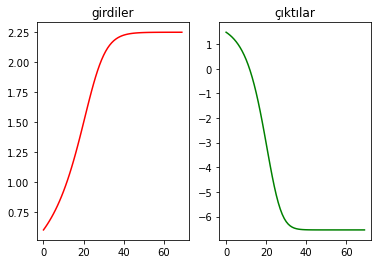

In [27]:
hesaplar = np.array(turev_farki_indir(girdi=6, fn=fiyat_fn))
print(hesaplar.shape)
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].set_title("girdiler")
axes[0].plot(hesaplar[:, 0], "r")
axes[1].set_title("çıktılar")
axes[1].plot(hesaplar[:, 1], "g")

plt.show()

Dolayısıyla 40. döngü civarında en düşük çıktı veren girdiye varıyoruz.

Bütün bu söylediklerimizi katmanlara uygulayalim.

In [28]:
class FiyatKatmaniSabitBoyut(Katman):
    def __init__(self, 
                 girdi: np.ndarray, 
                 hedef: np.ndarray):
        "Fiyat Fonksiyonu katmani"
        #boyut_kontrol(girdi)
        self.egim = np.random.randn(*girdi.shape)
        self.sapma = np.zeros_like(self.egim, dtype=np.float)
        self.hedef = hedef.copy()

        def m_x_arti_b(x: np.ndarray): return x * self.egim + self.sapma
        # hata fonksiyonu baslar
        def fiyat_fn(x: np.ndarray): return np.power(x - self.hedef, 2) / x.size
        # hata fonksiyonu biter
        super().__init__(flistesi=[m_x_arti_b, fiyat_fn], girdi=girdi.copy())

In [29]:
# yakinsamaya çalıştığımız fonksiyon
# f(x): 2x + 2 
girdi = np.array([6, 10, 2], dtype=np.float)
hedef = np.array([14, 22, 6], dtype=np.float)

In [30]:
def turev_farki_indir_katman(girdi_: np.ndarray, 
                             hedef_: np.ndarray,
                             katmanTipi="fiyat",
                             basamak=0.01, 
                             kabul_edilebilir_kesinlik=0.00001,
                             dongu_sayisi=1000):
    if girdi_.shape != hedef_.shape:
        raise ValueError('girdi ve hedeflerin boyutu ayni olmali')
    if katmanTipi == "fiyat":
        Katman = FiyatKatmaniSabitBoyut
    girdi = girdi_.copy()
    hedef = hedef_.copy()
    katman = Katman(girdi=girdi, hedef=hedef)
    egimler = []
    sapmalar = []
    verilenler = []
    alinanlar = []
    # pdb.set_trace()
    for i in range(dongu_sayisi):
        # asil olay
        egim = katman.egim
        sapma = katman.sapma
        katman_turevi = katman.turevi
        # jakobi matrisinin çaprazi
        # istedigimiz egimi veriyor
        # zira lineer fonksiyonlarin kismi turevi
        # degerlendirilirken her bir arguman ele alindigindan
        # turev matrisi sifirla dolu oluyor
        katman_egimi = katman_turevi.diagonal()
        katman_egimi = katman_egimi.reshape(*girdi.shape)
        #
        yeni_egim = egim - basamak * katman_egimi
        yeni_sapma = sapma - basamak * katman_egimi
        katman.egim = yeni_egim
        katman.sapma = yeni_sapma
        #
        egimler.append(egim)
        sapmalar.append(sapma)
        verilenler.append(katman.verdigi)
        alinanlar.append(katman.hesaplar[-1].aldigi)
        if abs(yeni_egim.sum()) <= kabul_edilebilir_kesinlik:
            break
        elif abs(yeni_sapma.sum()) <= kabul_edilebilir_kesinlik:
            break
    return egimler, sapmalar, verilenler, alinanlar, katman

In [31]:
veriler = turev_farki_indir_katman(girdi_=girdi, hedef_=hedef, dongu_sayisi=200)
katman = veriler[4]
hesaplar = [np.array(a) for a in veriler[:4]]

In [32]:
def hesabi_goster(indeks: int, hesaplar: list, aralik=100, baslangic=800):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    axes[0, 0].set_title("egimler")
    axes[0, 0].plot(hesaplar[0][baslangic:baslangic+aralik, indeks], "r")
    axes[0, 1].set_title("sapmalar")
    axes[0, 1].plot(hesaplar[1][baslangic:baslangic+aralik, indeks], "g")
    axes[1, 0].set_title("verilenler")
    axes[1, 0].plot(hesaplar[2][baslangic:baslangic+aralik, indeks], "black")
    axes[1, 1].set_title("alinanlar")
    axes[1, 1].plot(hesaplar[3][baslangic:baslangic+aralik, indeks], "blue")
    plt.tight_layout(True)
    plt.show()

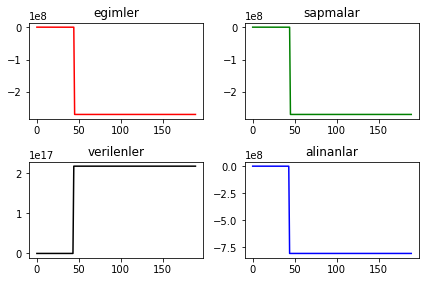

In [33]:
hesabi_goster(indeks=2, hesaplar=hesaplar, aralik=190, baslangic=0 )

In [34]:
# yakinsamaya çalıştığımız fonksiyon
# f(x): 2x + 2
# x = 9
# tahmin olarak bize 
mx_arti_b_noktasi = katman.hesaplar[0]
tahmin = mx_arti_b_noktasi.hesap_sonucu(girdi=np.array([9]))
yuvarlak = [np.around(t, 3) for t in tahmin]
print(yuvarlak)

[-27962914448.863, 19.94, -2691250243.499]


In [35]:
# yakinsamaya çalıştığımız fonksiyon


In [36]:
veriler1 = turev_farki_indir_katman(girdi_=girdi1, hedef_=hedef1)
katman1 = veriler1[4]
hesaplar2 = [np.array(a) for a in veriler1[:4]]

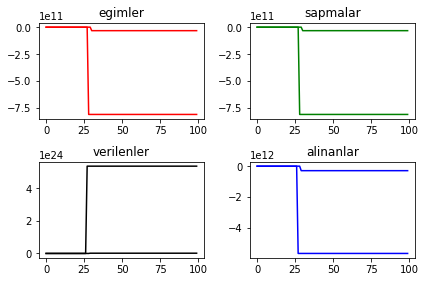

In [37]:
hesabi_goster(indeks=0, hesaplar=hesaplar2, aralik=100, baslangic=0)

In [38]:
mx_arti_b_noktasi = katman1.hesaplar[0]
tahmin = mx_arti_b_noktasi.hesap_sonucu(girdi=np.array([[7, 8]]))
yuvarlak = [np.around(t, 3) for t in tahmin]
print(yuvarlak)

[array([-6.47876081e+12, -2.92671530e+11]), array([-8.78112002e+13,  1.80000000e+01]), array([17.449, 21.246])]


Su zamana kadar hep dogrusal fonksiyonlarla ugrastik, yani $\mathbb{R}^n \to \mathbb{R}^n$ fonksiyonlarla ugrastik. 
Ancak bize gelen veriler, ozellikle gerçek hayatta kullandigimiz veriler her zaman dogrusal degiller. 
Ornegin bir resim matrisinden, resmin içindeki sayiyi yakalama gibi bir problem ile ugrasirken, girdimiz bir matris, çiktimiz ise bir sayi yani $\mathbb{R}^n \to \mathbb{R}$.
Problemi genel olarak ifade edelim: 

- Girdimiz: $\mathbb{R}^n$
- Çıktımız: $\mathbb{R}^m$

Ne yapacağız ?


Burada matematiksel olarak degisen fazla bir sey yok. 
Araya yeni fonksiyonlar ekleyerek girdi ile çikti arasindaki boyut farkini esitlemeye çalisiyoruz.
Ancak bakis açisi olarak durdugumuz noktayi degistiriyoruz.

Artik girdimiz ile çiktimiz arasindaki iliski dogrusal modellenmiyor, olasilik olarak modelleniyor.
Dolayisiyla $f(x) = y$ arasindaki iliski artik $p(x)=y$. 

Bunu soyle okuyalim. $x$ verildiginde $y$ gozlendi.
Verilen ile gozlenen arasindaki iliskiyi dogrusal olarak varsayalim, yani
$mx + b = y$ olarak *varsayalim*.

Bunun bir varsayim oldugunu unutmayalim, zira bu varsayim dogru olmak zorunda degil, dolayisiyla verilen ile gozlenen arasindaki iliskinin ne oldugunu biliyorsak, bu varsayimi yapmadan o fonksiyonu kullanmak daha iyi bir sonuç verecektir.

Yukaridaki iliskiyi olasilik olarak tarif etmek istedigimizde soyle bir ifade yaziyoruz: 
$$p(x; \theta ) = y \hspace{0.5cm}\theta=[m, b]$$ 

Bunu soyle okuyalim.
Theta parametreleri ile belirlenmis x verildiginde y gozluyoruz. 
Olasilik hesaplarinin onemli bir ozelligi var, o da bir sonucu veren olasiliklarin toplami 1'i geçemez.
Yine notasyon olarak su da kullaniliyor: $p(y|x;\theta)$. Bunu da ayni sekilde okuyabiliriz, theta ile belirlenmis x verili oldugunda y gozleniyor.
Theta ile verilen parametreleri kullanarak hipotezler kurgulayabiliriz. 
Yani
$h_{\theta_1}(x) = y$, $h_{\theta_2}(x) = y$, ..., $h_{\theta_n}(x)=y$.
Diyelim ki toplam da iki tane olasilik var:

- x verili oldugunda y gozleniyor.
- x verili oldugunda ~y gozleniyor.

O halde x verili oldugunda y gozlenme ihtimali 0.5dir, ve yine x verili oldugunda ~y gozlenme ihtimali 0.5dir.

x ornegin bir sayi olsun: $x=75$, y de baska bir sayi olsun $y=3$. 75 verili oldugunda 3 gozleme ihtimali 0.5 ifadesini nasil saglayacagiz.
Yani oyle bir fonksiyon lazim ki bize girdileri ihtimallere donusturebilmeli.

Bu fonksiyonun imzasi su: $$f: \mathbb{R} \to (0, 1]$$. Yani bir gerçek sayiyi aliyor herhangi bir turden girdiyi vs alip, onu 0, 1 araligina koyuyor, bu aralik da zaten olasilik araligi.

Bu isi yapan fonksiyonlardan biri lojistik fonksiyonu olarak biliniyor: 
$$s(x) = \frac{e^x}{1+e^{x}}$$
Yineliyorum burada mesele lojistik fonksiyonu da degil,
mesele geleni 0 ile 1 arasina çekmekte, zira boylelikle geleni bir olasilik gibi degerlendirebiliyoruz.

Problem su: Elimde bir grup girdi ve bir grup çikti var.
Bu ikisini birbirine esledigini varsaydigim bir fonksiyonum var ($mx +b$). 
$m$ ve $b$yi yakinsamak istiyorum, ancak veriler birbirinden bagimsiz gozlemlerden olusuyor, ve esasen girdim ve çiktim arasindaki iliskinin dogrusal olup olmadigini da
bilmiyorum. 

Yapilmasi gereken sey su, eldeki parametreler ile bir hipotez uretip o hipotezi ilgili verinin hedefiyle test etmek, ve bu hedefe yakinlik veya uzakliga gore parametreleri guncellemek, yani basindan beri yaptigimiz sey.

Burada temel problem kullanilacak fiyat fonksiyonunun yapisinda, zira lojistik fonksiyonu bize bir olasilik veriyor. 

Bir ornegini gorelim.

In [39]:
# sayilar wikipedia'dan alinmistir
# https://en.wikipedia.org/wiki/Logistic_regression
calisma_saati = [0.50, 0.75, 1.00,
                 1.25, 1.50, 1.75,
                 1.75, 2.00, 2.25,
                 2.50, 2.75, 3.00,
                 3.25, 3.50, 4.00,
                 4.25, 4.50, 4.75,
                 5.00, 5.50]
sinavi_gecti = [0, 0, 0, 
                0, 0, 0,
                1, 0, 1,
                0, 1, 0,
                1, 0, 1,
                1, 1, 1,
                1, 1]

[0.62245933 0.6791787  0.73105858 0.77729986 0.81757448 0.8519528
 0.8519528  0.88079708 0.90465054 0.92414182 0.93991335 0.95257413
 0.96267311 0.97068777 0.98201379 0.98593637 0.98901306 0.99142251
 0.99330715 0.99592986]


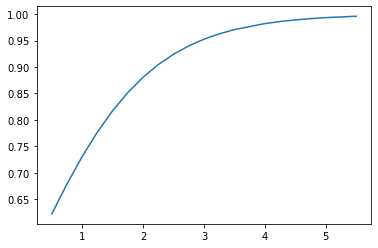

In [40]:
calisma_np = np.array(calisma_saati, dtype=np.float)
lojistik_calisma = np.exp(calisma_np) / (1 + np.exp(calisma_np))
print(lojistik_calisma)
plt.plot(calisma_np, lojistik_calisma)

**Dikkat**: Fonksiyonumuzda bir sorun var, zira (0, 1] araliginda degil, (0.5, 1] araliginda çikti veriyor. Neden ? Çunku, lojistik fonksiyon pozitif degerleri 0.5'ten sonra arasina koyuyor, negatif degerleri 0.5'ten onceye koyuyor. 
Bir ornek ile ne demek istedigimizi gorelim.

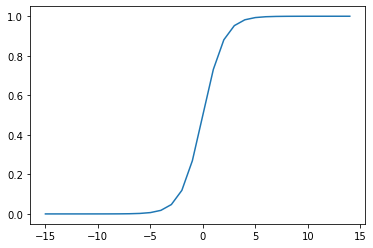

In [41]:
yeni_np = np.array([*range(-15, 15, 1)], dtype=np.float)
lojistik_yeni = np.exp(yeni_np) / (1 + np.exp(yeni_np))
plt.plot(yeni_np, lojistik_yeni)

Örnek problem:

Girdiler:

- Ogrencilerin çalisma saatleri
- Ogrencilerin sinavi geçip geçmedikleri

Bu veriler isiginda 7 saat ve 0.34 saat çalisan iki ogrencinin 
sinavi geçip geçmeyecegini nasil bilebiliriz ?

Bu ve bunun gibi girdi ile çikti arasinda dogrudan bir iliski kurulamayan durumlar yukarida bahsettigimiz gerçek hayatta karsilastigimiz durumlara daha yakinlar.

Ilgili katmani yazalim:

In [42]:
class IkiDegerliOlasilikKatmani(Katman):
    def __init__(self, 
                 girdi: np.ndarray, 
                 hedef: np.ndarray):
        "iki degerli olasilik katmani"
        #boyut_kontrol(girdi)
        self.egim = np.random.uniform(0, 1, size=girdi.shape)
        self.sapma = np.random.randn(*hedef.shape)
        self.hedef = hedef.copy()
        super().__init__(flistesi=[self.skor, self.sigmoid_ln, 
                                   self.maliyet_fn], girdi=girdi.copy())

    def skor(self, x: np.ndarray):
        "mx + b"
        return np.dot(x, self.egim.T) + self.sapma
        
    def sigmoid_ln(self, x: np.ndarray):
        "lojistik fonksiyon olarak da bilinir"
        return np.exp(x) / (1 + np.exp(x))
    
    def maliyet_fn(self, x: np.ndarray):
        """
        Fiyat fonksiyonunun geldigi yer:
        http://ufldl.stanford.edu/tutorial/supervised/LogisticRegression/
        Aciklamasi için
        https://en.wikipedia.org/wiki/Cross_entropy
        """
        logit_girdi = self.hedef.dot(np.log(x))
        logit_diger = (1 - self.hedef).dot(np.log(1 - x))
        return -1 * (logit_girdi + logit_diger).sum() / logit_diger.size
        # hata fonksiyonu biter  
        
    def tahmin(self, x: float):
        """
        Tahmini yaparken dikkate almamiz gereken unsurlar sunlar.
        Logit bize pozitif degerler için 0 1 arasi bir deger degil
        0.5 - 1 arasi bir deger veriyor. Dolayisiyla
        eger girdilerimizin tamami pozitif ise, logit'in bize verdigi
        aralik (0.5 - 1] araligi olacak.
        Bizim 0.5 degerini bir geçit gibi kullanabilmemiz için lojistikten
        gelen çiktiyi (0, 1] alanina çekmeliyiz.
        """
        # self.hesapla()
        thm = self.sigmoid_ln(self.skor(x))
        thm1 = np.interp(thm, [0.5, 1], [0, 1])        
        return 0 if thm1.max() <= 0.5 else 1

In [43]:
def turev_farki_indir_katman(girdi_: np.ndarray, 
                             hedef_: np.ndarray,
                             katmanTipi="ikidegerli",
                             basamak=0.01, 
                             kabul_edilebilir_kesinlik=0.00001,
                             dongu_sayisi=1000):
    if katmanTipi == "fiyat":
        Katman = FiyatKatmaniSabitBoyut
    elif katmanTipi == "ikidegerli":
        Katman = IkiDegerliOlasilikKatmani
    girdi = girdi_.copy()
    hedef = hedef_.copy()
    katman = Katman(girdi=girdi, hedef=hedef)
    egimler = []
    sapmalar = []
    verilenler = []
    alinanlar = []
    # pdb.set_trace()
    for i in range(dongu_sayisi):
        # asil olay
        egim = katman.egim
        sapma = katman.sapma
        katman_turevi = katman.turevi
        # jakobi matrisinin çaprazi
        # istedigimiz egimi veriyor
        # zira lineer fonksiyonlarin kismi turevi
        # degerlendirilirken her bir arguman ele alindigindan
        # turev matrisi sifirla dolu oluyor
        katman_egimi = katman_turevi
        #katman_egimi = katman_turevi.diagonal()
        katman_egimi = katman_egimi.reshape(*girdi.shape)
        #
        # isaret eksiden artiya dondu
        yeni_egim = egim + basamak * katman_egimi
        yeni_sapma = sapma + basamak * (katman.hedef - katman.verdigi)
        katman.egim = yeni_egim
        katman.sapma = yeni_sapma
        #
        egimler.append(egim)
        sapmalar.append(sapma)
        verilenler.append(katman.verdigi)
        alinanlar.append(katman.hesaplar[-1].aldigi)
        if abs(yeni_egim.sum()) <= kabul_edilebilir_kesinlik:
            break
        elif abs(yeni_sapma.sum()) <= kabul_edilebilir_kesinlik:
            break
    return egimler, sapmalar, verilenler, alinanlar, katman

In [44]:
veriler = turev_farki_indir_katman(girdi_=np.array([np.array([c]) for c in calisma_saati], dtype=np.float), 
                                   hedef_=np.array([np.array(s) for s in sinavi_gecti], dtype=np.float), 
                                   dongu_sayisi=20)
katman = veriler[4]

In [45]:
hesaplar = [np.array(veriler[0])]
hesaplar.insert(1,  np.array(veriler[2]))
hesaplar.insert(2,  np.array(veriler[3]))
hesaplar.insert(3, np.array(veriler[1]))
print("egimler sekli: ", hesaplar[0].shape)
print("verilenler sekli: ", hesaplar[1].shape)
print("alinanlar sekli: ", hesaplar[2].shape)
print("sapmalar sekli: ", hesaplar[3]. shape)

egimler sekli:  (20, 20, 1)
verilenler sekli:  (20,)
alinanlar sekli:  (20, 20, 20)
sapmalar sekli:  (20, 20)


In [46]:
def hesabi_goster(indeks: int, hesaplar: list, aralik=100, baslangic=0):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    axes[0, 0].set_title("egimler")
    axes[0, 0].plot(hesaplar[0][baslangic:baslangic+aralik, indeks], "r")
    axes[0, 0].set_xticks(range(baslangic, baslangic+aralik, 10))
    axes[0, 1].set_title("sapmalar")
    axes[0, 1].plot(hesaplar[3][baslangic:baslangic+aralik, indeks], 
                    "g")
    axes[1, 0].set_title("verilenler")
    axes[1, 0].set_xticks(range(baslangic, baslangic+aralik, 10))
    axes[1, 0].plot(hesaplar[1][baslangic:baslangic+aralik], "black",)
    axes[1, 1].set_title("alinanlar")
    axes[1, 1].set_xticks(range(baslangic, baslangic+aralik, 10))
    axes[1, 1].plot(hesaplar[2][baslangic:baslangic+aralik, indeks], "blue")
    plt.tight_layout(True)
    plt.show()

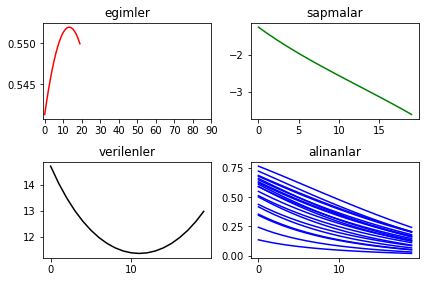

In [47]:
hesabi_goster(indeks=0, hesaplar=hesaplar, aralik=100, baslangic=0)

In [48]:
# test edelim
print(katman.tahmin(np.array(7)))
print(katman.tahmin(np.array(1)))
print(katman.tahmin(np.array(3.9)))

1
0
1


Az once gordugumuz problem de iki tane seçenek vardi. Geçmek ve kalmak.
Peki daha fazla seçenek olsa ne olacak ? Degisen neredeyse hiçbir sey yok.

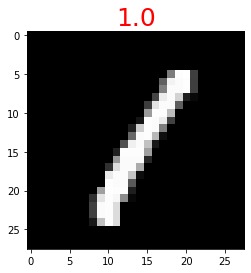

In [49]:
def resim_olustur(satir: np.ndarray):
    """
    mnist_egit verisinden resim olustur
    Her satirin ilk hucresi hedef,
    diger hucreleri de pixel degerleri.
    Toplam resmin boyutu da pixel degerlerinin
    bulundugu hucrelerinin toplam sayisinin
    kare koku kadar. Neden ?
    Çunku eger toplamda 784 pixel varsa,
    ve resim kare seklindeyse (ki oyle bunu
    veriye iliskin yaptigimiz okumalar sayesinde
    ogrenebiliriz) bu toplam sayiya resmin
    enini ve boyunu çarparak ulasmisizdir
    """
    hedef = satir[0]
    degerler = satir[1:].copy()
    toplam_sayi = degerler.size
    en_boy_deger = np.sqrt(toplam_sayi)
    en_boy_deger = en_boy_deger.astype(np.int)
    degerler = degerler.reshape((en_boy_deger, en_boy_deger))
    return hedef, degerler

def resmi_goster(satir: np.ndarray):
    "olusturacagimiz resmi gosterelim"
    hedef, resim = resim_olustur(satir)
    hedefstr = str(hedef)
    plt.imshow(resim, cmap="gray")
    plt.title(hedefstr, color="red",fontsize=25)
    plt.plot()
    
resmi_goster(mnist_egit[3])

In [60]:
class CokDegerliOlasilikKatmani(Katman):
    def __init__(self, 
                 girdi: np.ndarray, 
                 hedef: np.ndarray):
        "iki degerli olasilik katmani"
        # girdi.shape == ornek_sayisi, ornek_ozellikleri 
        # hedef.shape == ornek_sayisi
        #boyut_kontrol(girdi)
        print(girdi.shape)
        gr = girdi.reshape(-1)
        gr = np.interp(gr, [gr.min(), gr.max()], [0, 1])
        gr = gr.reshape(*girdi.shape)
        self.hedef_asil = hedef.copy()
        self.etiketler = np.unique(hedef)
        self.etiket_sayisi = len(self.etiketler)
        # gosterge fonksiyonu için one hot encoding
        hedef_ = np.eye(self.etiket_sayisi)
        enc = {self.etiketler[i]:hedef_[i] for i in range(self.etiket_sayisi)}
        hedef_ = [enc[h] for h in self.hedef_asil]
        #
        self.hedef = np.array(hedef_, dtype=np.int)
        hshape = self.hedef.shape
        #print(self.hedef)
        self.sapma = np.random.uniform(0, 1, size=hshape)
        self.egim = np.random.uniform(0, 1, size=(girdi.shape[1], self.etiket_sayisi))
        #self.egim = np.random.uniform(0, 1, size=girdi.shape)
        super().__init__(flistesi=[self.mx, self.arti_b, self.multi_sigmoid_ln, 
                                   self.maliyet_fn], girdi=gr.copy())
        
    def mx(self, x: np.ndarray):
        "skorun mx bolumu"
        # turevi alininca beklenileni vermiyor çunku egim bagimli degisken degil
        return np.dot(x, self.egim)
    
    def arti_b(self, x: np.ndarray):
        return np.add(x, self.sapma)
    
    def skor(self, x: np.ndarray):
        return x.dot(self.egim) + self.sapma
        
    def multi_sigmoid_ln(self, x: np.ndarray):
        "softmax olarak da bilinir"
        #print("s: ", x.shape)
        z = x - x.max(axis=1, keepdims=True) # stabil hespalama için gerekli
        # soft argmax = softmax(x + skaler) = softmax(x)
        #print("z: ", z.shape)
        pay = np.exp(z)
        payda = pay.sum(axis=1, keepdims=True)
        res = pay / payda
        # print(res[0, :].sum()) #Hata ayiklama butun sutunlar 1 olmali
        # print("res:", res[0, :].sum())
        return res
    
    def etikete_donustur(self, x: np.ndarray):
        "etiketlere donusturme"
        index = x.argmax(axis=1)
        print("max index: ", index)
        print("etiketler: ", self.etiketler)
        return self.etiketler[index]
        
    def maliyet_fn(self, x: np.ndarray):
        """
        Fiyat fonksiyonunun geldigi yer:
        https://en.wikipedia.org/wiki/Cross_entropy
        Neden bu fonksiyon kullaniliyor:
        Çunku aradigimiz sey iki olasilik dagilimi arasindaki benzerlik veya farklilik
        gosterge fonksiyonu araciligiyla 1-0'a çevirdigimiz
        hedef veriseti yaklasmaya çalistigimiz olasilik dagilimi
        hesabimiz ise x.
        
        fonkisyonun alindigi site:
        https://mattpetersen.github.io/softmax-with-cross-entropy
        """
        maliyet = np.zeros((x.shape[0]), dtype=np.float)
        for i in range(x.shape[0]):
            res = self.hedef[i].dot(np.log(x[i]))
            maliyet[i] = res
            
        return -1 * maliyet
        # hata fonksiyonu biter
        
    def tahmin(self, x: np.ndarray):
        """
        x: vektor
        """
        # self.hesapla()
        xint = np.interp(x, [x.min(), x.max()], [0, 1])
        thm = self.multi_sigmoid_ln(self.skor(x))
        # print("softmax çiktisi: ", thm)
        return thm

Artik Mnist veri setini analiz etmek için butun araçlara sahibiz

In [61]:
hedefler, girdiler = mnist_egit[:20, 0], mnist_egit[:20, 1:]

In [62]:
print("hedeflerin sekli: ", hedefler.shape)
print("hedeflerin boyutu: ", hedefler.ndim)
print("girdilerin sekli: ", girdiler.shape)
print("girdilerin boyutu: ", girdiler.ndim)

hedeflerin sekli:  (20,)
hedeflerin boyutu:  1
girdilerin sekli:  (20, 784)
girdilerin boyutu:  2


In [67]:
basamak=0.1
kabul_edilebilir_kesinlik=0.01
dongu_sayisi=50

In [68]:
girdi = girdiler.copy()
hedef = hedefler.copy()
katman = CokDegerliOlasilikKatmani(girdi=girdi, hedef=hedef)
egimler = []
sapmalar = []
verilenler = []
alinanlar = []
# pdb.set_trace()
for i in range(dongu_sayisi):
    # asil olay
    egim = katman.egim
    sapma = katman.sapma
    katman_turevi = katman.turevi
    # jakobi matrisinin çaprazi
    # istedigimiz egimi veriyor
    # zira lineer fonksiyonlarin kismi turevi
    # degerlendirilirken her bir arguman ele alindigindan
    # turev matrisi sifirla dolu oluyor
    katman_egimi = katman_turevi
    #katman_egimi = katman_turevi.diagonal()
    #pdb.set_trace()

    katman_egimi = katman_egimi.reshape((girdi.shape[0], -1, girdi.shape[0]))
    katman_egimi = katman_egimi.sum(axis=-1).sum(axis=0)
    # isaret eksiden artiya dondu
    #pdb.set_trace()
    verdigi = katman.verdigi
    #print(verdigi.shape)
    #print(sapma.shape)
    #print(katman.hedef.shape)
    fark = katman.hedef.T - verdigi
    yeni_egim = egim.T + basamak * katman_egimi
    yeni_sapma = sapma + basamak * (katman.hedef.T - verdigi).T
    #print(yeni_egim.shape)
    katman.egim = yeni_egim.T
    katman.sapma = yeni_sapma

    #
    egimler.append(egim)
    sapmalar.append(sapma)
    verilenler.append(katman.verdigi)
    alinanlar.append(katman.hesaplar[-1].aldigi)
    if abs(yeni_egim.sum()) <= kabul_edilebilir_kesinlik:
        break
    elif abs(yeni_sapma.sum()) <= kabul_edilebilir_kesinlik:
        break

(20, 784)


In [69]:
#katman
egimler = np.array(egimler)
verilenler = np.array(verilenler)
alinanlar = np.array(alinanlar)
sapmalar = np.array(sapmalar)
print("egimler sekli: ", egimler.shape)
print("verilenler sekli: ", verilenler.shape)
print("alinanlar sekli: ", alinanlar.shape)
print("sapmalar sekli: ", sapmalar. shape)

egimler sekli:  (50, 784, 10)
verilenler sekli:  (50, 20)
alinanlar sekli:  (50, 20, 10)
sapmalar sekli:  (50, 20, 10)


(50,)


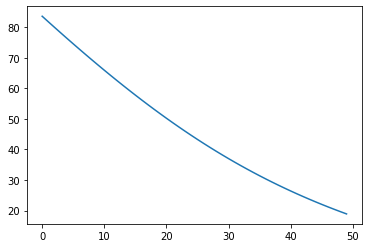

In [70]:
vsu = verilenler.sum(axis=1)
print(vsu.shape)
plt.plot(verilenler.sum(axis=1))

In [77]:
thmin = katman.tahmin(mnist_egit[5, 1:])

In [78]:
print(thmin.shape)
tahmin_argmax = thmin.argmax(axis=1)
print(tahmin_argmax)
print(katman.etiketler)
print(katman.etiketler[tahmin_argmax.max()])

(20, 10)
[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
8.0


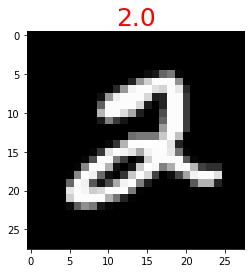

In [79]:
resmi_goster(mnist_egit[5])